# About DataSet 

## Link: https://www.kaggle.com/datasets/khoongweihao/aaplcsv?resource=download

The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo. Check this article to learn more about yfinance: Reliably download historical market data from with Python

- Objective: Predict stock prices using historical data.

- Techniques: Recurrent Neural Networks (RNN), Long Short-Term Memory (LSTM), Time Series Analysis

- Skills: Deep learning, time series forecasting, model evaluation (MSE, RMSE)

## Techniques

#### What Is a Recurrent Neural Network (RNN)?
- Imagine you’re reading a book, and each sentence depends on the previous one. For example, if the previous sentence mentioned a character named “Alice,” the next sentence might continue with Alice’s actions. RNNs work similarly—they’re specialized neural networks designed for sequences of data, where each data point depends on the previous ones.

- Here’s how they work:

##### Memory and Feedback Loop:
- RNNs have a concept of “memory.” This memory allows them to store information about past inputs.
- Think of it as a feedback loop: the output from one step becomes part of the input for the next step.
- This feedback loop allows RNNs to capture dependencies between data points in a sequence.

##### Unfolding in Time:
- Imagine an RNN as a loop that unfolds over time. Each step corresponds to a specific moment in the sequence.
- The first diagram shows a compressed representation of an RNN, while the second diagram unrolls it into three time steps.
- By unrolling, we create a chain of interconnected neural network layers—one for each time step.

##### Math Behind RNNs:
- RNNs use a set of weights to update their internal state at each time step.
- The formula for updating the hidden state (memory) at time step (t) is:

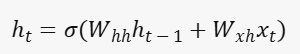

- (h_t) represents the hidden state at time (t).
- (W_{hh}) and (W_{xh}) are weight matrices.
- (\sigma) is an activation function (like the sigmoid or tanh function).
- (x_t) is the input at time (t).


##### Applications:
- Natural Language Processing (NLP): RNNs excel at tasks like language modeling, machine translation, and sentiment analysis.
- Time Series Prediction: They’re great for predicting stock prices, weather patterns, and other time-dependent data.
- Speech Recognition: RNNs power voice assistants like Siri and Google’s voice search.
- Music Generation: RNNs can compose music based on existing melodies.
- Video Analysis: They can track objects in video frames over time.

Remember, RNNs are like the storytellers of the neural network world—they remember past events and use that knowledge to predict what happens next! 📚🤖

#### What Is LSTM?
Imagine you’re reading a book, and each chapter builds upon the previous one. LSTMs work similarly—they’re specialized neural networks designed to handle sequences of data with long-term dependencies. Here’s how they do it:

##### Memory Cells:
- LSTMs introduce a memory cell, which acts like a container that can hold information for an extended period.
- Unlike traditional RNNs, which struggle with long-term dependencies, LSTMs can selectively retain relevant information over time.

##### Three Magical Gates:
- LSTMs have three gates: the input gate, the forget gate, and the output gate.
- These gates control what information enters, exits, and stays in the memory cell.

##### Math Behind LSTMs:
The hidden state (h_t) (like short-term memory) at time step (t) is updated based on:

ht​=σ(Whh​ht−1​+Wxh​xt​)

- (W_{hh}) and (W_{xh}) are weight matrices.
- (\sigma) is an activation function (like sigmoid or tanh).
- (x_t) is the input at time (t).

##### Bidirectional LSTMs:
- Imagine having a memory that looks both forward and backward in time.
- Bidirectional LSTMs (Bi LSTMs) process data in both directions, capturing longer-range dependencies.
- They’re like having two LSTMs—one reads forward, the other backward—and their outputs combine for the final result.

###### Real-World Applications:
1. Language Translation:
- LSTMs excel at translating text from one language to another.
- They remember context across sentences, ensuring accurate translations.

2. Speech Recognition:
- When you talk to Siri or Google Assistant, LSTMs help convert your speech into text.
- They handle the nuances of spoken language.

3. Time Series Forecasting:
- Predicting stock prices, weather patterns, or sales data—all thanks to LSTMs.
- They capture trends and patterns over time.

4. Text Summarization:
- LSTMs summarize lengthy articles or documents.
- They pick out essential information while ignoring fluff.

Remember, LSTMs are like the memory maestros of neural networks—they remember what matters and forget the noise! 🧠🤖

#### What Is Time Series Analysis?
Imagine you’re tracking something over time—like daily stock prices, monthly energy consumption, or yearly website traffic. Time series analysis (TSA) is like putting on special glasses that help you see patterns and trends within these sequential data points.

##### Here’s how it works:
1. Sequential Data:
- TSA focuses on data collected at regular intervals (e.g., daily, weekly, yearly).
- Unlike traditional data analysis, where observations are independent, TSA considers the temporal aspect.

##### Why It Matters:
- TSA uncovers hidden gems: trends, seasonality, and fluctuations.
- It’s like predicting tomorrow’s weather based on historical patterns.

##### Real-World Applications:
1. Stock Price Prediction:
- Using historical stock prices, TSA helps forecast future values.
- Investors make informed decisions based on these predictions.

2. Energy Consumption Forecasting:
- Utility companies use TSA to predict energy demand.
- It ensures efficient resource allocation.

3. Website Traffic Prediction:
- E-commerce sites analyze past traffic patterns.
- TSA helps optimize server capacity and user experience.

4. Sales Demand Forecasting:
- Retailers use TSA to estimate future product demand.
- It guides inventory management.

5. Temperature Forecasting:
- Meteorologists rely on TSA for weather predictions.
- Historical temperature data informs their models.

6. Financial Market Analysis:
- Traders analyze time series data to make buy/sell decisions.
- Trends and cycles matter!

##### Techniques and Models:

1. ARIMA Models:
- A classic choice for time series forecasting.
- Combines autoregression, differencing, and moving averages.

2. Holt-Winters Method:
- Handles seasonality and trends.
- Great for short-term predictions.

3. LSTM Networks:
- Like memory wizards for sequences.
- Used in speech recognition, stock prediction, and more.

##### Metrics:
- ACF (Auto-Correlation Function): Measures how data points relate to their past values.
- PACF (Partial Auto-Correlation Function): Focuses on direct relationships.

Remember, TSA is your time-traveling companion—it reveals insights from the past to guide your future decisions! 📊⏰

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [2]:
# Load dataset
data = pd.read_csv("C:/DA/Content/Oeson/New_ML/RNN/AAPL.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


- Set the 'Date' column as the index.
- Normalize the 'Close' prices using MinMaxScaler to scale the data between 0 and 1.

In [3]:
data.shape

(184, 6)

In [4]:
# General info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2014-09-29 to 2018-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


In [5]:
# Data preprocessing
# Select features
features = data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features)

- MinMaxScaler: This scaler transforms the data such that all values are within the range [0, 1]. This helps the LSTM model to learn more effectively.

In [6]:
# Prepare training data
# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length][3]  # Predicting 'Close' price
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

- data: The input data, which is a 2D array where rows represent time steps and columns represent different features (e.g., Open, High, Low, Close, Volume).
- seq_length: The number of time steps in each input sequence. Here, it's set to 60.
- xs: This list will store the input sequences.
- ys: This list will store the corresponding target values (the values we want to predict).
- The loop runs from 0 to len(data) - seq_length, ensuring that each sequence has seq_length number of data points.
- x: This is a slice of the data from index i to i + seq_length. It represents one sequence of seq_length time steps.
- y: This is the 'Close' price at the index i + seq_length. Here, [3] is used to select the 'Close' price from the feature columns (assuming 'Close' is the fourth column in the data).
- seq_length = 60: We define the sequence length as 60 time steps (days).
- X, y = create_sequences(scaled_data, seq_length): We call the function with our scaled data and the sequence length. X will contain all the input sequences, and y will contain the corresponding 'Close' prices to predict.

In [7]:
# Split data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

- len(X): This gives the total number of sequences in the dataset.
- 0.8 * len(X): Multiplies the total number of sequences by 0.8 to get 80% of the data. This value is used to split the data into training (80%) and testing (20%) sets.
- int(...): Converts the calculated value to an integer (since indices must be whole numbers). This integer represents the index at which the data will be split.

## Step 2: Building the Model

Define the LSTM Model:

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

- LSTM Layers: Capture the temporal dependencies in the sequential data.
- Dropout Layers: Prevent overfitting by randomly dropping units during training.
- Dense Layer: Outputs the final prediction.
- Adam Optimizer: Efficiently adjusts the learning rate during training.
- MSE Loss: Measures the accuracy of the predictions for regression tasks.

## Step 3: Training the Model

In [9]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
3/3 [==============================] - 6s 646ms/step - loss: 0.0714 - val_loss: 0.0724
Epoch 2/20
3/3 [==============================] - 0s 53ms/step - loss: 0.0233 - val_loss: 0.0065
Epoch 3/20
3/3 [==============================] - 0s 62ms/step - loss: 0.0249 - val_loss: 0.0054
Epoch 4/20
3/3 [==============================] - 0s 107ms/step - loss: 0.0132 - val_loss: 0.0055
Epoch 5/20
3/3 [==============================] - 0s 67ms/step - loss: 0.0117 - val_loss: 0.0120
Epoch 6/20
3/3 [==============================] - 0s 103ms/step - loss: 0.0105 - val_loss: 0.0060
Epoch 7/20
3/3 [==============================] - 0s 76ms/step - loss: 0.0112 - val_loss: 0.0044
Epoch 8/20
3/3 [==============================] - 0s 105ms/step - loss: 0.0088 - val_loss: 0.0108
Epoch 9/20
3/3 [==============================] - 0s 109ms/step - loss: 0.0091 - val_loss: 0.0048
Epoch 10/20
3/3 [==============================] - 0s 100ms/step - loss: 0.0093 - val_loss: 0.0039
Epoch 11/20
3/3 [======

- X_train: Training data (input sequences).
- y_train: Training labels (corresponding target values).
- epochs=20: Number of times the entire training dataset will be passed through the model during training.
- batch_size=32: Number of samples per gradient update. The model will be updated after every 32 samples.
- validation_split=0.1: Fraction of the training data (10%) to be used as validation data to monitor the model's performance during training.
- history: Stores the training history, including loss and validation metrics, which can be used for further analysis and visualization.

## Step 4: Evaluating the Model

In [10]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate((np.zeros((predicted_prices.shape[0], 4)), predicted_prices), axis=1))[:, 4]

# Inverse transform the actual prices
actual_prices = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 4)), y_test.reshape(-1, 1)), axis=1))[:, 4]

1/1 [==============================] - 1s 843ms/step


- predicted_prices: Uses the trained model to predict the stock prices for the test data (X_test).
- np.concatenate: Concatenates the predicted prices with an array of zeros to match the original number of features (adding 4 columns of zeros).
- scaler.inverse_transform: Applies the inverse of the scaling transformation to convert the scaled predictions back to the original scale.
- [:, 4]: Extracts the 'Close' prices from the inverse-transformed array (5th column).
- y_test.reshape(-1, 1): Reshapes the actual prices to a 2D array with one column.
- np.concatenate: Concatenates the actual prices with an array of zeros to match the original number of features (adding 4 columns of zeros).
- scaler.inverse_transform: Applies the inverse of the scaling transformation to convert the scaled actual prices back to the original scale.
- [:, 4]: Extracts the 'Close' prices from the inverse-transformed array (5th column).

In [11]:
# Calculate Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


MSE: 1711259536161093.8
MAE: 34788369.99745924
RMSE: 41367372.845771745


1. Mean Squared Error (MSE):
- MSE: 1711259536161093.8
- MSE measures the average of the squares of the errors, that is, the average squared difference between the actual and predicted values. A higher value indicates larger errors.
- In this case, the MSE value is extremely large, suggesting that the model's predictions are significantly off from the actual values.

2. Mean Absolute Error (MAE):
- MAE: 34788369.99745924
- MAE measures the average of the absolute errors, that is, the average absolute difference between the actual and predicted values. It is a direct measure of the model's prediction accuracy.
- An MAE of around 34.8 million indicates that, on average, the predicted prices deviate from the actual prices by this amount, which is substantial.

3. Root Mean Squared Error (RMSE):
- RMSE: 41367372.845771745
- RMSE is the square root of the MSE. It provides an error metric in the same units as the target variable (stock prices in this case), making it easier to interpret.
- An RMSE of around 41.4 million confirms that the model's predictions have large deviations from the actual prices, similar to the MAE.

**Summary**
- High MSE and RMSE values indicate that the model's predictions are not close to the actual stock prices.
- High MAE further confirms that the average prediction error is very large.

## Step 5: Visualization

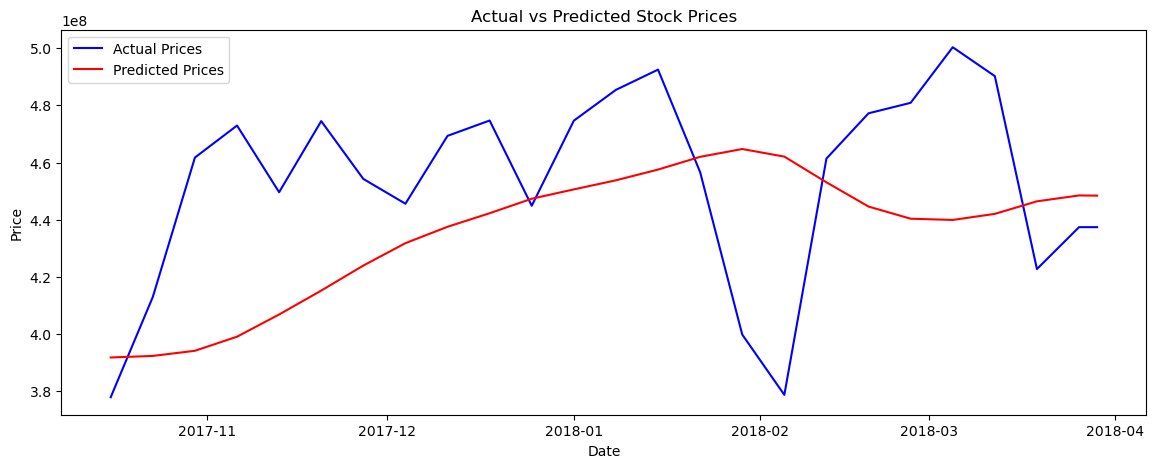

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(actual_prices):], actual_prices, color='blue', label='Actual Prices')
plt.plot(data.index[-len(predicted_prices):], predicted_prices, color='red', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

### Inferences 

**Trends:**
- The actual prices (blue line) show significant fluctuations with notable peaks and troughs.
- The predicted prices (red line) show a smoother, more gradual trend compared to the actual prices.

**Performance:**
- The predicted prices fail to capture the sharp movements in the actual prices. This is evident in the periods where the actual prices rise or fall steeply, but the predicted prices remain relatively steady.
- The model seems to underestimate the peaks and overestimate the troughs, indicating it is not accurately capturing the volatility of the stock prices.

**Alignment:**
- While there is some overall alignment in the general trend (both actual and predicted prices seem to - increase from 2017-10 to around 2018-01), the predicted prices do not match the actual prices closely in terms of specific values or sharp changes.


### Possible Issues and Solutions:

1. Model Complexity: Your model might be too simple to capture the complex patterns and volatility in stock prices. Consider adding more layers, units, or more sophisticated architectures like a stacked LSTM or a combination of LSTM and other layers.
2. Feature Engineering: Incorporate additional features that might help the model better understand the stock price movements, such as technical indicators (moving averages, RSI, etc.), external market factors, or other relevant financial metrics.
3. Hyperparameter Tuning:Experiment with different hyperparameters, such as the number of epochs, batch size, learning rate, and dropout rates, to improve the model's performance.
4. Data Preprocessing:Ensure that the data is properly preprocessed and scaled. Check if the scaling and inverse scaling are performed correctly.
5. Training Data: Ensure that the training data is representative of various market conditions. If the training data does not include enough instances of volatility, the model may not learn to predict such movements accurately.
